In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pylab
figsize = (11, 7)
pylab.rcParams['figure.figsize'] = figsize

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from systems.provided.futures_chapter15.basesystem import futures_system
from analysis import plotting
from sysdata.configdata import Config
import pandas as pd


In [4]:
vol_20_system = futures_system()
vol_20_system.accounts.portfolio().stats()

[[('min', '-0.764'),
  ('max', '0.1589'),
  ('median', '0'),
  ('mean', '0.0006711'),
  ('std', '0.02224'),
  ('skew', '-5.726'),
  ('ann_daily_mean', '0.1718'),
  ('ann_daily_std', '0.3559'),
  ('sharpe', '0.4827'),
  ('sortino', '0.4677'),
  ('avg_drawdown', '-0.339'),
  ('time_in_drawdown', '0.9864'),
  ('calmar', '0.1109'),
  ('avg_return_to_drawdown', '0.5068'),
  ('avg_loss', '-0.01581'),
  ('avg_gain', '0.01534'),
  ('gaintolossratio', '0.9702'),
  ('profitfactor', '1.113'),
  ('hitrate', '0.5343')],
 ('You can also plot:', ['rolling_ann_std', 'drawdown', 'curve']),
 ('You can also print:', ['weekly', 'monthly', 'annual'])]

In [5]:
vol_40_config = Config("systems.provided.futures_chapter15.futuresconfig.yaml")
vol_40_config.percentage_vol_target = 40
vol_40_system = futures_system(config=vol_40_config)
vol_40_system.accounts.portfolio().stats()

[[('min', '-1.528'),
  ('max', '0.3179'),
  ('median', '0'),
  ('mean', '0.001342'),
  ('std', '0.04448'),
  ('skew', '-5.726'),
  ('ann_daily_mean', '0.3436'),
  ('ann_daily_std', '0.7118'),
  ('sharpe', '0.4827'),
  ('sortino', '0.4677'),
  ('avg_drawdown', '-0.678'),
  ('time_in_drawdown', '0.9864'),
  ('calmar', '0.1109'),
  ('avg_return_to_drawdown', '0.5068'),
  ('avg_loss', '-0.03161'),
  ('avg_gain', '0.03067'),
  ('gaintolossratio', '0.9702'),
  ('profitfactor', '1.113'),
  ('hitrate', '0.5343')],
 ('You can also plot:', ['rolling_ann_std', 'drawdown', 'curve']),
 ('You can also print:', ['weekly', 'monthly', 'annual'])]

In [47]:
p = vol_40_system.portfolio.get_notional_positions()


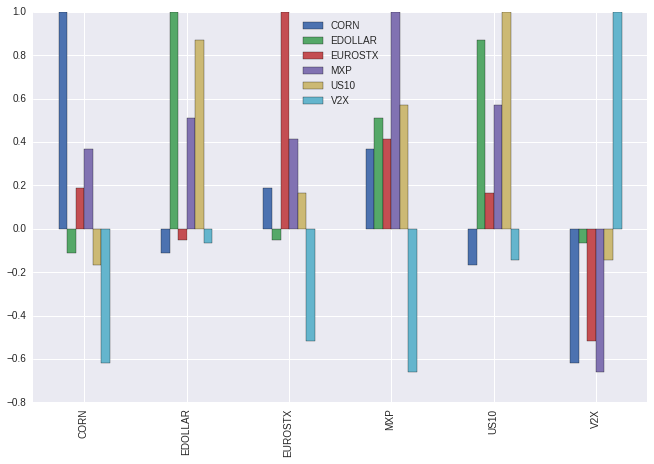

In [7]:
p.dropna().corr().plot(kind='bar')

In [13]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
sns

<module 'seaborn' from '/home/chris/miniconda/envs/carver/lib/python3.5/site-packages/seaborn/__init__.py'>

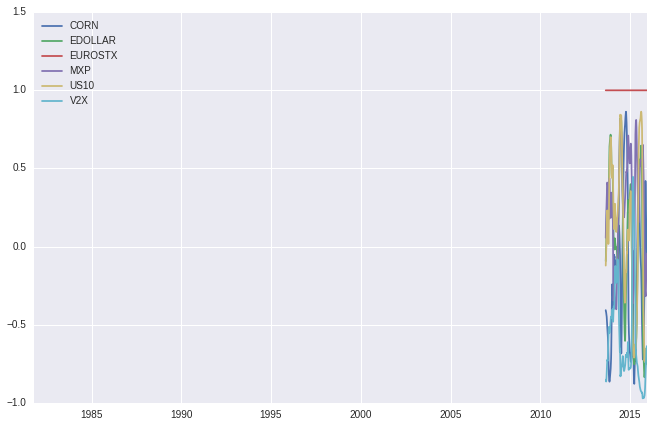

In [69]:
pd.rolling_corr(p['EUROSTX'], p, 100).plot()

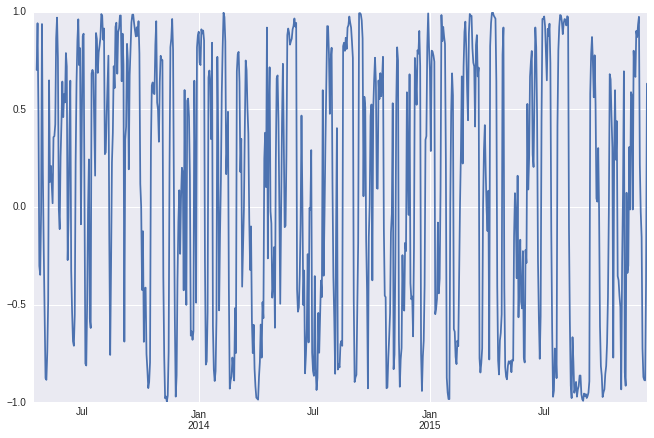

In [55]:
c.plot()

In [46]:
pd.rolling_corr?

In [44]:
p.items[-2]

Timestamp('2015-12-09 00:00:00', offset='B')

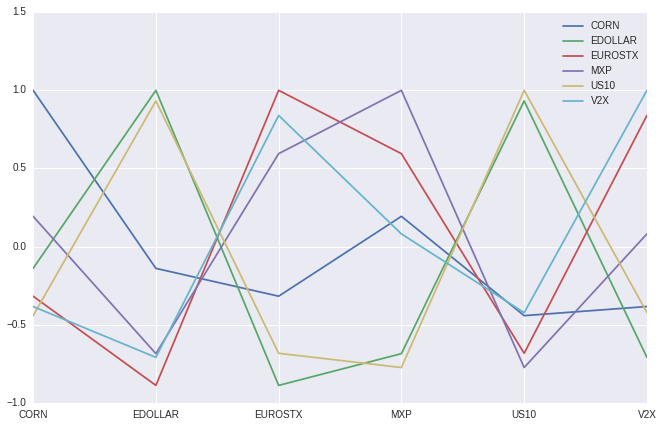

In [41]:
p[p.items[-2]].plot()

/home/chris/miniconda/envs/carver/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


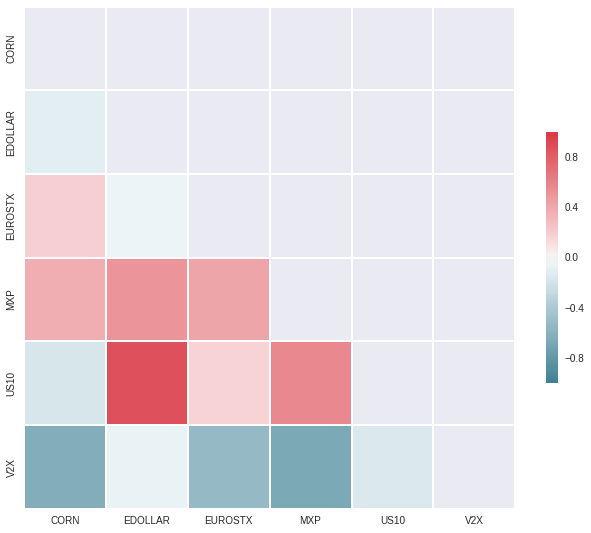

In [19]:
corr = p.dropna().corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            linewidths=1, cbar_kws={"shrink": .5}, ax=ax)

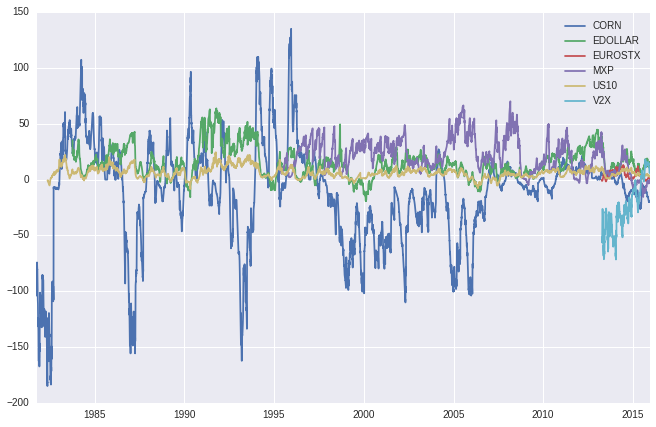

In [72]:
vol_40_system.portfolio.get_notional_positions().plot()

In [ ]:
import systems

In [ ]:
systems.__file__

In [ ]:
futures_system.__file__

In [ ]:
vol_40_system.portfolio.get_notional_positions()

In [ ]:
vol_20_system.portfolio.get_instrument_list()

In [ ]:
vol_20_system.positionSize.get_daily_cash_vol_target()

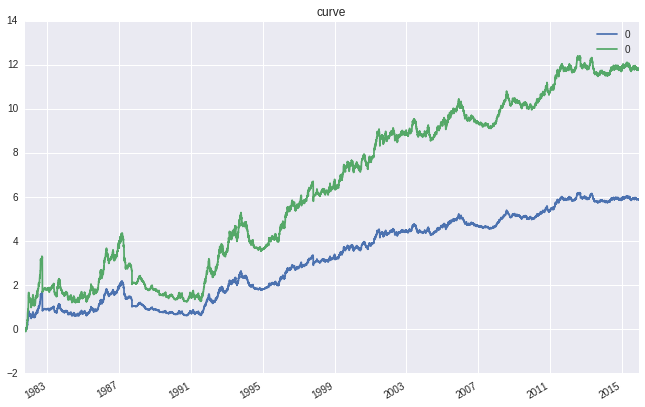

In [71]:
plotting.compare([vol_20_system, vol_40_system], 'curve')
None

In [ ]:
plotting.compare([vol_20_system, vol_40_system], 'drawdown')
None

In [ ]:
plotting.